In [1]:
#install dependencies
!pip install easyocr
!pip install imutils
#help us with our contours once we get those detected

In [2]:
#
import cv2
#
from matplotlib import pyplot as plt
#
import numpy as np
#
import imutils
#
import easyocr

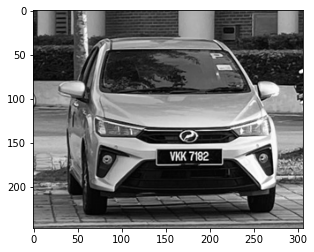

In [63]:
#read image and perform the gray scalar
#read image
#we pass through initial image()
img = cv2.imread('10.png')
#gray scout
#recolour image, convert from the sigle color code to different one
#pass initial image, ,variable(img)
#passed the colour code conversion that we want to do 
#cv2 read in the format blue green red
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#visualize
#done and show it using matplotlib
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

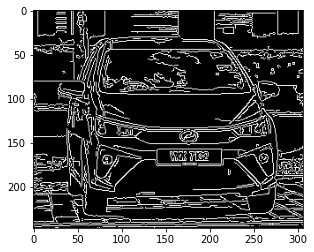

In [64]:
#apply filtering as well as applying some edge detection
#remove noise from our image
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
#able to detect edges within our image
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [65]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [66]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [67]:
location

array([[[ 83, 228]],

       [[146, 220]],

       [[ 84, 213]],

       [[ 99, 222]]], dtype=int32)

In [68]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

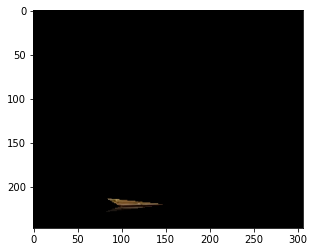

In [69]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [59]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

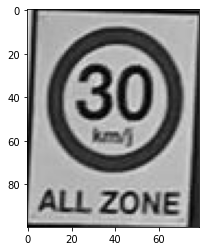

In [60]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [61]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[19, 21], [63, 21], [63, 57], [19, 57]], '30', 0.9999777465365097),
 ([[2, 76], [74, 76], [74, 100], [2, 100]], 'ALLZONE', 0.9973007271678623)]

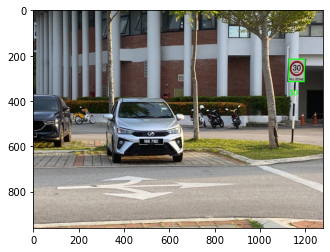

In [62]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [1]:
#import webbrowser
import urllib.request

In [54]:
import cv2
import numpy as np
import imutils
import easyocr
from tkinter import Tk, Button, Label
from tkinter import filedialog
from PIL import Image, ImageTk

def process_image():
    # Read the selected image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply bilateral filtering for noise reduction
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

    # Perform edge detection using Canny algorithm
    edged = cv2.Canny(bfilter, 30, 200)

    # Find contours and select the largest quadrilateral contour
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    # Create a binary mask based on the selected contour
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)

    # Apply the mask to the original image to extract the region of interest
    new_image = cv2.bitwise_and(img, img, mask=mask)

    # Crop the region of interest from the grayscale image
    (x, y) = np.where(mask == 255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2 + 1, y1:y2 + 1]

    # Perform OCR on the cropped image
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    text = result[0][-2]

    # Display the processed image with the recognized text
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1] + 60),
                      fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 255, 0),
                      thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

    # Convert the processed image to PIL format
    processed_image = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    image_pil = Image.fromarray(processed_image)

    # Update the image label with the processed image
    image_tk = ImageTk.PhotoImage(image_pil)
    image_label.configure(image=image_tk)
    image_label.image = image_tk

def browse_image():
    global image_path
    image_path = filedialog.askopenfilename(filetypes=[('Image Files', '*.jpg')])
    if image_path:
        # Load the selected image
        image_pil = Image.open(image_path)
        image_pil = image_pil.resize((400, 400))  # Resize the image for display

        # Update the image label with the loaded image
        image_tk = ImageTk.PhotoImage(image_pil)
        image_label.configure(image=image_tk)
        image_label.image = image_tk                      
        

# Create the GUI window
window = Tk()
window.title("Image Processing System")

# Set the size of the window
#window.geometry("400x400")

# Create a button to browse for an image
browse_button = Button(window, text="Browse", command=browse_image)
browse_button.pack()

# Create a label to display the image
image_label = Label(window)
image_label.pack()

# Create a button to process the image
process_button = Button(window, text="Process", command=process_image)
process_button.pack()

# Start the GUI event loop
window.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_23216\1825497103.py", line 14, in process_image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

